In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


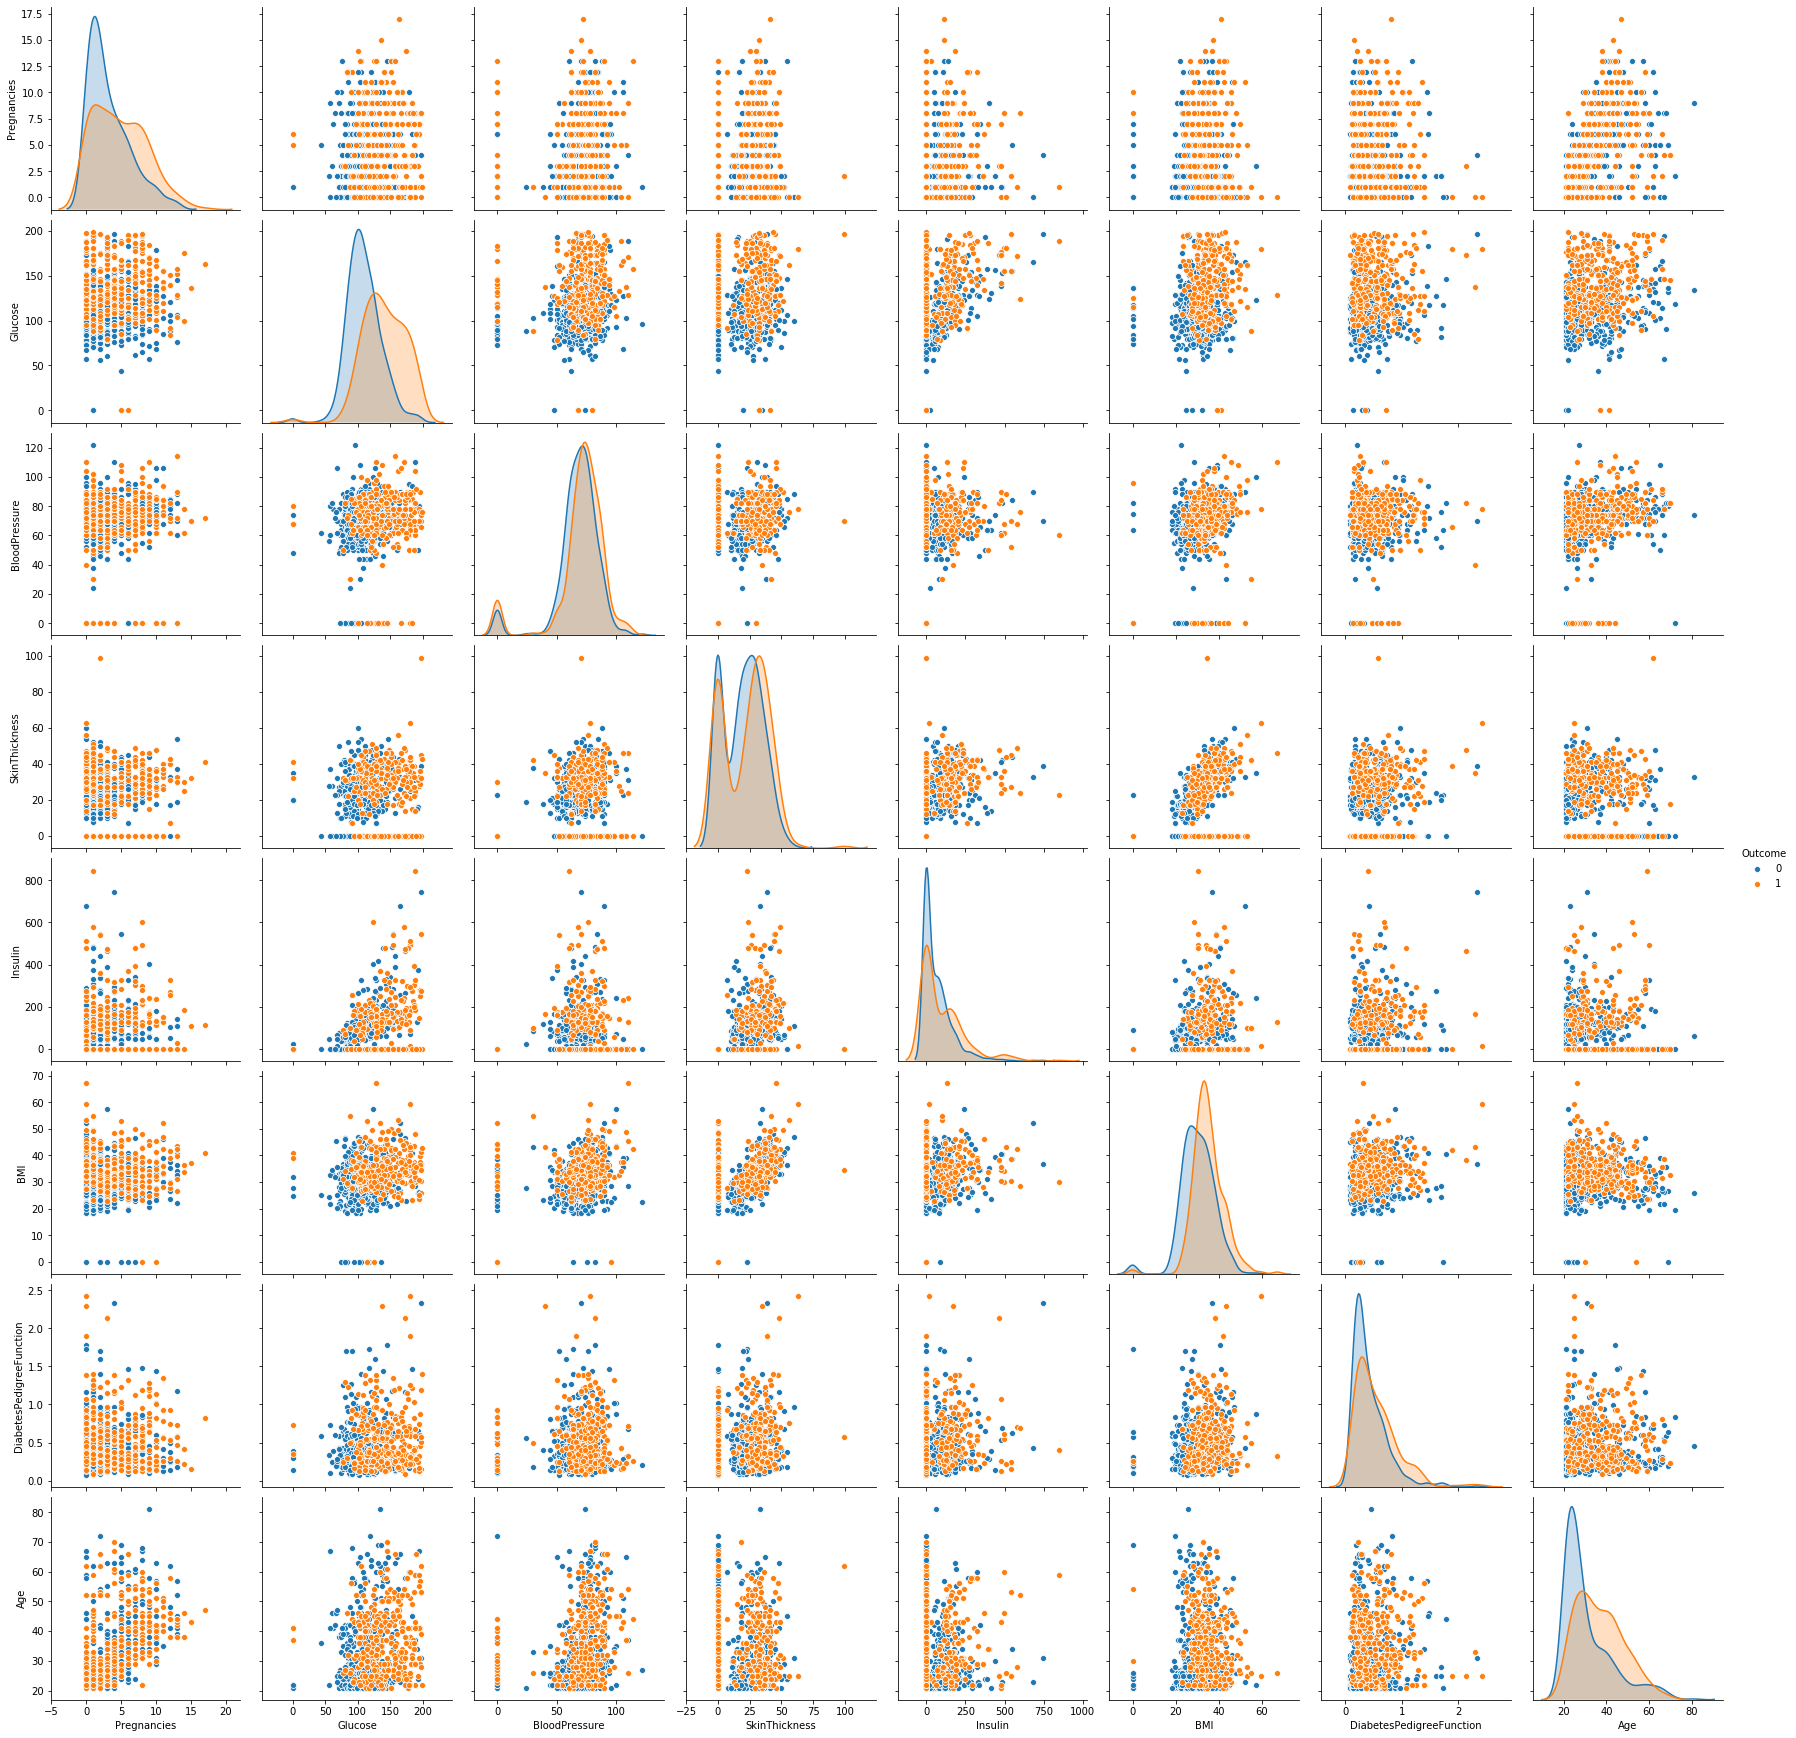

In [3]:
sns.pairplot(df,hue='Outcome',size=3)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X=df.iloc[:,:-1].values
y=df.Outcome

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.25,random_state=0)


In [7]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(train_x,train_y)

C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred=reg.predict(test_x)

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix=metrics.confusion_matrix(test_y,y_pred)
cnf_matrix

array([[115,  15],
       [ 25,  37]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

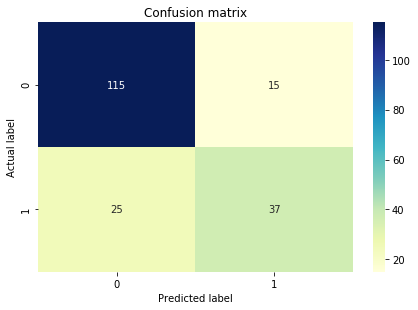

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
from sklearn import metrics
print('Accuracy  :',metrics.accuracy_score(test_y,y_pred))
print('Precision :',metrics.precision_score(test_y,y_pred))
print('Recall    :',metrics.recall_score(test_y,y_pred))

Accuracy  : 0.7916666666666666
Precision : 0.7115384615384616
Recall    : 0.5967741935483871


### ROC AUC Curve

In [12]:
y_pred_prob=reg.predict_log_proba(test_x)[::,1]
fpr,tpr,_=roc_curve(test_y,y_pred_prob)
auc=metrics.roc_auc_score(test_y,y_pred_prob)
auc

0.8604218362282878

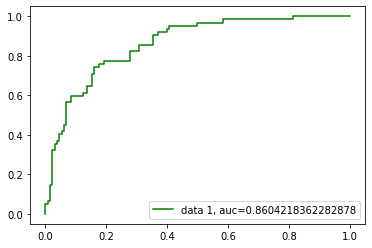

In [13]:
# plot AUC
plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='g')
plt.legend(loc=4)
plt.show()

In [14]:
import statsmodels.api as sm
test_x=sm.add_constant(test_x)
model=sm.Logit(test_y,test_x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.413171
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  192
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                            8
Date:                Mon, 10 Aug 2020   Pseudo R-squ.:                  0.3432
Time:                        20:20:45   Log-Likelihood:                -79.329
converged:                       True   LL-Null:                       -120.78
Covariance Type:            nonrobust   LLR p-value:                 1.274e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7220      1.556     -5.607      0.000     -11.771      -5.673
x1             0.2603      0.078      3.336      0.001       0.107       0.413
x2             0.0420      0.008      5.209      0.000       0.026       0.058
x3            -0.0201      0.011     -1.914      0.056      -0.041       0.000
x4            -0.0130      0.015     -0.884      0.377      -0.042       0.016
x5            -0.0015      0.002     -0.755      0.450      -0.005       0.002
x6             0.0906      0.032      2.845      0.004       0.028       0.153
x7             1.1643      0.649      1.794      0.073      -0.108       2.436
x8            -0.0035      0.021     -0.165      0.869      -0.045       0.038
==============================================================================
"""